In [13]:
import pandas as pd
import os
import re
from datetime import datetime, timedelta
import cv2
import numpy as np
import matplotlib.pyplot as plt
from image_points import *
from read_positions import read_positions
import largestinteriorrectangle as lir
from perspective import *
%matplotlib inline
from helper import *



In [14]:
# background = cv2.imread('back.jpeg')
# plot_images(background)
# for i, pt in enumerate(MAP_PTS_1):
#     plt.annotate(str(i) + " - " + str(pt), xy=pt, textcoords="offset points", xytext=(10,10), arrowprops=dict(arrowstyle="->"))
# img1 = cv2.imread('heat.png')
# plot_images(img1)
# for i, pt in enumerate(IMAGE_PTS_1):
#     plt.annotate(str(i) + " - " + str(pt), xy=pt, textcoords="offset points", xytext=(10,10), arrowprops=dict(arrowstyle="->"))

In [15]:
# background = cv2.imread('back.jpeg')
# plot_images(background)
# for i, pt in enumerate(MAP_PTS_2):
#     plt.annotate(str(i) + " - " + str(pt), xy=pt, textcoords="offset points", xytext=(10,10), arrowprops=dict(arrowstyle="->"))
# img = cv2.imread('backgrounds/background2.png')
# plot_images(img)
# for i, pt in enumerate(IMAGE_PTS_2):
#     plt.annotate(str(i) + " - " + str(pt), xy=pt, textcoords="offset points", xytext=(10,10), arrowprops=dict(arrowstyle="->"))

In [16]:
# IMAGE_PTS_2 = np.array([[35, 447], [1050, 299], [912, 405], [281, 513]])
# MAP_PTS_2 = np.array([[695, 242],  [688, 552], [609, 463], [609, 291]])

# H, mask = cv2.findHomography(IMAGE_PTS_2, MAP_PTS_2)
# height, width = background.shape[:2]
# print(height, width)
# dst = cv2.warpPerspective(img, H, (width, height))
# plot_images(dst,background)

In [17]:
# IMAGE_PTS_2 = np.array([[3, 447], [1055, 299], [915, 411], [284, 513]])
# MAP_PTS_2 = np.array([[695, 242],  [688, 552], [609, 458], [609, 291]])

# H, mask = cv2.findHomography(IMAGE_PTS_1, MAP_PTS_1)
# height, width = background.shape[:2]
# print(height, width)
# dst = cv2.warpPerspective(img1, H, (width, height))
# plot_images(dst)


In [18]:
# def draw_bounding_rect(image, bounding_rect, col=(0, 255, 0)):
#     """
#     Draws a rectangle on the image based on the bounding rectangle parameters.

#     Parameters:
#     - image: The image on which to draw the rectangle.
#     - bounding_rect: A tuple of the form (x, y, w, h) representing the top-left corner coordinates,
#                      width, and height of the bounding rectangle.
#     """
#     x, y, w, h = bounding_rect
    
#     # Draw the rectangle on the image
#     cv2.rectangle(image, (x, y), (x + w, y + h), col, 2)

# df = df_proj
# #common_dates = set(df[df['Camera'] == 1].Date.unique()).intersection(df[df['Camera'] == 2].Date.unique())


# heatmap_width, heatmap_height = 856, 572
# def f():
#     background = cv2.imread('back.jpeg')
#     cnt = 0
#     for i, x in enumerate(common_dates):
#         #print(i, x)
#         similar = df[df['Date']==pd.to_datetime(x)]
#         #print(similar)
#         ones = similar[similar['Camera']==1]
#         #print(ones)
#         twos = similar[similar['Camera'] == 2]
#         for idx, (_, o) in enumerate(ones.iterrows()):
#             print(o)
            
#             c1 = (o['X_center'], o['Y_center'])
#             #distance = np.linalg.norm(np.array(c1) - np.array(c2))
#             cols = ['Point1', 'Point2', 'Point3', 'Point4']
#             polygon1 = [(float(o[col][0])*heatmap_width, float(o[col][1]) *heatmap_height) for col in cols]
#             vertices1 = np.array(polygon1, dtype=np.int32)
#             c1 = (c1[0]*heatmap_width, c1[1]*heatmap_height)
#             draw_circle(background, c1[0], c1[1], 10, (0,255-70*idx,0))
#             print(idx)
#             draw_bounding_rect(background, cv2.boundingRect(vertices1), (0,255-70*idx, 0))
            
#         for idx, (_, o) in enumerate(twos.iterrows()):
#             print(o)
            
#             c1 = (o['X_center'], o['Y_center'])
#             #distance = np.linalg.norm(np.array(c1) - np.array(c2))
#             cols = ['Point1', 'Point2', 'Point3', 'Point4']
#             polygon1 = [(float(o[col][0])*heatmap_width, float(o[col][1]) *heatmap_height) for col in cols]
#             vertices1 = np.array(polygon1, dtype=np.int32)
#             c1 = (c1[0]*heatmap_width, c1[1]*heatmap_height)
#             draw_circle(background, c1[0], c1[1], 10, (255-70*idx,0, 0))
#             print(idx)
#             draw_bounding_rect(background, cv2.boundingRect(vertices1), (255-70*idx, 0, 0))
#     plot_images(background)
# f()

In [19]:
# img1 = cv2.imread('../../data/images/screenshot1_05_02__16_45.png')
# img2 = cv2.imread('../../data/images/screenshot2_05_02__16_45.png')
# plot_images(img1, img2)

In [20]:
# def draw_bounding_rect(image, bounding_rect, col=(0, 255, 0)):
#     """
#     Draws a rectangle on the image based on the bounding rectangle parameters.

#     Parameters:
#     - image: The image on which to draw the rectangle.
#     - bounding_rect: A tuple of the form (x, y, w, h) representing the top-left corner coordinates,
#                      width, and height of the bounding rectangle.
#     """
#     x, y, w, h = bounding_rect
    
#     # Draw the rectangle on the image
#     cv2.rectangle(image, (x, y), (x + w, y + h), col, 2)

# df = df_proj
# #common_dates = set(df[df['Camera'] == 1].Date.unique()).intersection(df[df['Camera'] == 2].Date.unique())


# heatmap_width, heatmap_height = 856, 572
# def f():
#     background = cv2.imread('back.jpeg')
#     cnt = 0
#     for i, x in enumerate(common_dates):
#         #print(i, x)
#         similar = df[df['Date']==pd.to_datetime(x)]
#         #print(similar)
#         ones = similar[similar['Camera']==1]
#         #print(ones)
#         twos = similar[similar['Camera'] == 2]
            
        
#         for idx1, o in ones.iterrows():
#             for idx2, t in twos.iterrows():
#                 c1 = (o['X_center'], o['Y_center'])
#                 c2 = (t['X_center'], t['Y_center'])
#                 distance = np.linalg.norm(np.array(c1) - np.array(c2))
#                 cols = ['Point1', 'Point2', 'Point3', 'Point4']
#                 polygon1 = [(float(o[col][0])*heatmap_width, float(o[col][1]) *heatmap_height) for col in cols]
#                 polygon2 = [(float(t[col][0])*heatmap_width, float(t[col][1]) *heatmap_height) for col in cols]
#                 vertices1 = np.array(polygon1, dtype=np.int32)
#                 vertices2 = np.array(polygon2, dtype=np.int32)
#                 c1 = (c1[0]*heatmap_width, c1[1]*heatmap_height)
#                 c2 = (c2[0]*heatmap_width, c2[1]*heatmap_height)
                
#                 # print(f'IOU = {calculate_iou(cv2.boundingRect(vertices1), cv2.boundingRect(vertices2))}')
#                 if distance <= 0.1 and calculate_iou(cv2.boundingRect(vertices1), cv2.boundingRect(vertices2)) > 0.05:
#                     print(distance)
#                     background = cv2.imread('back.jpeg')
#                     print(f'IOU = {calculate_iou(cv2.boundingRect(vertices1), cv2.boundingRect(vertices2))}')
#                     # plot_images(background)
#                     if cnt <= 15:
#                         draw_bounding_rect(background, cv2.boundingRect(vertices1))
#                         draw_bounding_rect(background, cv2.boundingRect(vertices2), (255,0,0))
#                         draw_circle(background, c1[0], c1[1], 10, (0,255,0))
#                         draw_circle(background, c2[0], c2[1], 10, (255,0,0))
#                         plot_images(background)
#                         cnt+=1
                        
                    
            
            
            
    
    
# f()

573 890


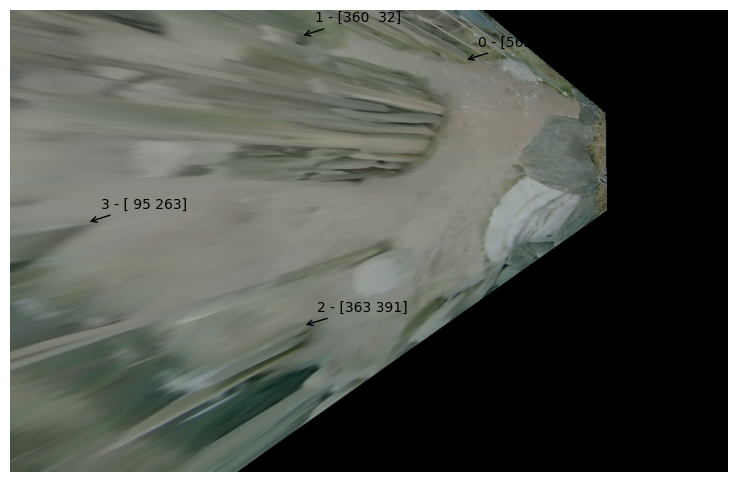

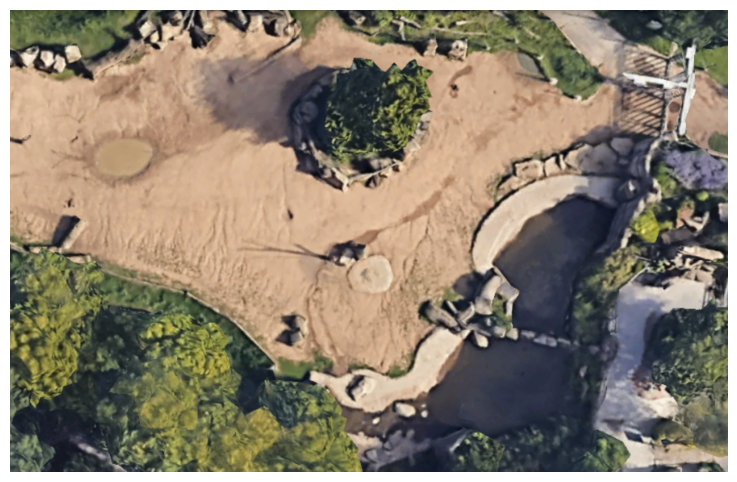

In [21]:
IMAGE_PTS_6 = np.array([[1394, 416], [1158, 326], [248, 428], [600, 342]])
MAP_PTS_6 = np.array([[563, 62], [360, 32], [363, 391], [95, 263]])

background = cv2.imread('backgrounds/background6.png')
map = cv2.imread('maps/map6_real.png')
H, mask = cv2.findHomography(IMAGE_PTS_6, MAP_PTS_6)
height, width = map.shape[:2]
print(height, width)
dst = cv2.warpPerspective(background, H, (width, height))
plot_images(dst)
for i, pt in enumerate(MAP_PTS_6):
    plt.annotate(str(i) + " - " + str(pt), xy=pt, textcoords="offset points", xytext=(10,10), arrowprops=dict(arrowstyle="->"))
plot_images(map)

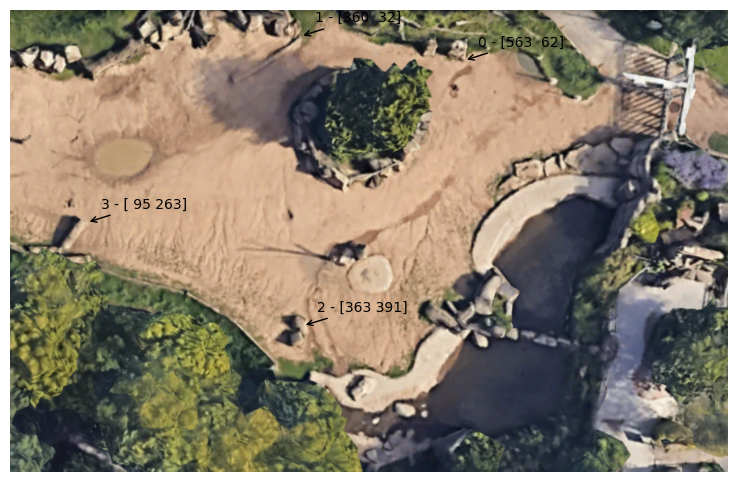

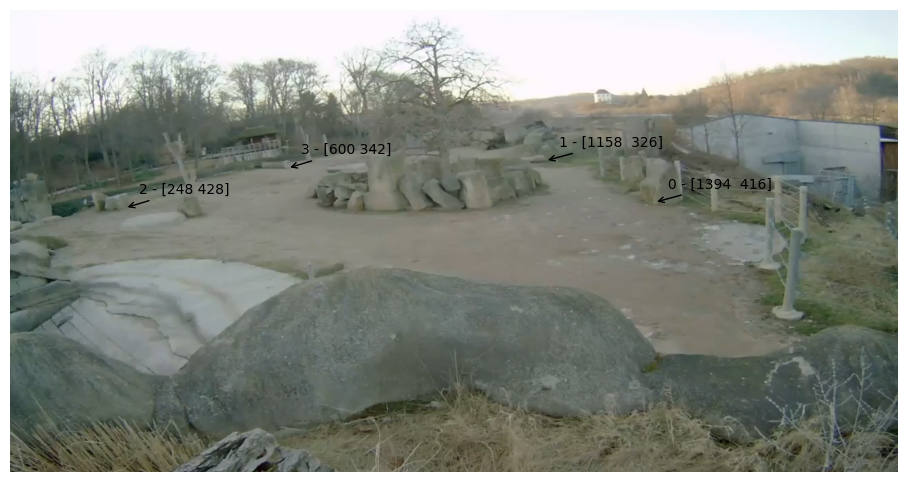

In [22]:
IMAGE_PTS_6 = np.array([[1394, 416], [1158, 326], [248, 428], [600, 342]])
MAP_PTS_6 = np.array([[563, 62], [360, 32], [363, 391], [95, 263]])

map = cv2.imread('maps/map6_real.png')
plot_images(map)
for i, pt in enumerate(MAP_PTS_6):
    plt.annotate(str(i) + " - " + str(pt), xy=pt, textcoords="offset points", xytext=(10,10), arrowprops=dict(arrowstyle="->"))
img = cv2.imread('backgrounds/background6.png')
plot_images(background)
for i, pt in enumerate(IMAGE_PTS_6):
    plt.annotate(str(i) + " - " + str(pt), xy=pt, textcoords="offset points", xytext=(10,10), arrowprops=dict(arrowstyle="->"))

In [23]:
# IMAGE_PTS_6 = np.array([[1394, 416], [721, 65], [248, 428], [600, 342]])
# MAP_PTS_6 = np.array([[1126, 124], [113, 162], [150, 300], [124, 396]])

# background = cv2.imread('backgrounds/background4.png')
# map = cv2.imread('maps/map6_real.png')
# H, mask = cv2.findHomography(IMAGE_PTS_6, MAP_PTS_6)
# height, width = map.shape[:2]
# print(height, width)
# dst = cv2.warpPerspective(background, H, (width, height))
# plot_images(dst)
# for i, pt in enumerate(MAP_PTS_6):
#     plt.annotate(str(i) + " - " + str(pt), xy=pt, textcoords="offset points", xytext=(10,10), arrowprops=dict(arrowstyle="->"))
# plot_images(map)

488 838


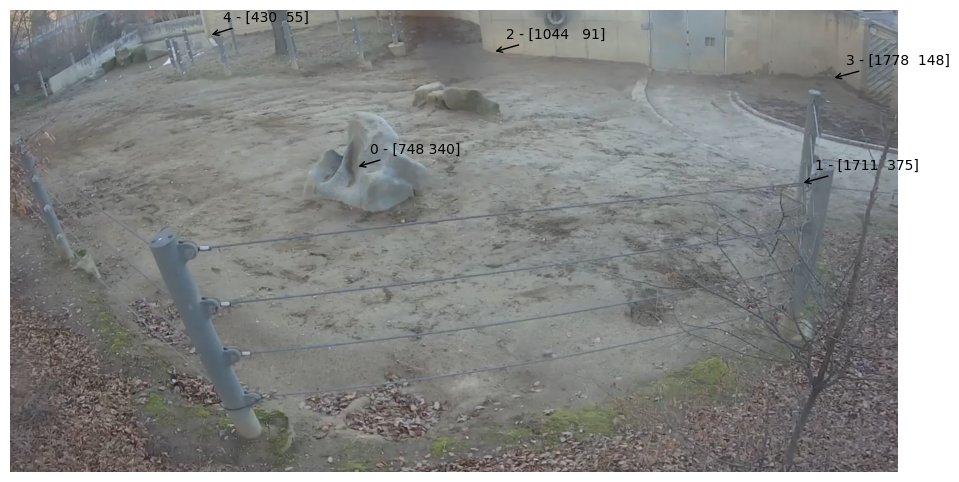

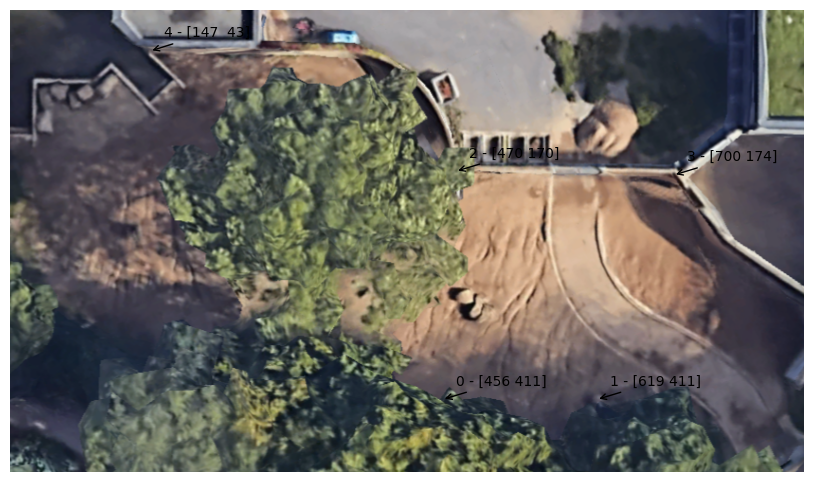

In [83]:
IMAGE_PTS_4 = np.array([[748, 340],[1711, 375], [1044, 91], [1778, 148], [430, 55]])
MAP_PTS_4 = np.array([ [456, 411], [619, 411], [470, 170], [700, 174], [147, 43]])

# IMAGE_PTS_4 = np.array([[748, 340], [1778, 148], [1711, 375], [169, 151]])
# MAP_PTS_4 = np.array([ [456, 411], [700, 174], [619, 411], [43, 120]])


background = cv2.imread('backgrounds/background4.png')
map = cv2.imread('maps/map4_real.png')
H, mask = cv2.findHomography(IMAGE_PTS_4, MAP_PTS_4)
height, width = map.shape[:2]
print(height, width)
dst = cv2.warpPerspective(background, H, (width, height))
plot_images(background)
for i, pt in enumerate(IMAGE_PTS_4):
    plt.annotate(str(i) + " - " + str(pt), xy=pt, textcoords="offset points", xytext=(10,10), arrowprops=dict(arrowstyle="->"))
plot_images(map)
for i, pt in enumerate(MAP_PTS_4):
    plt.annotate(str(i) + " - " + str(pt), xy=pt, textcoords="offset points", xytext=(10,10), arrowprops=dict(arrowstyle="->"))

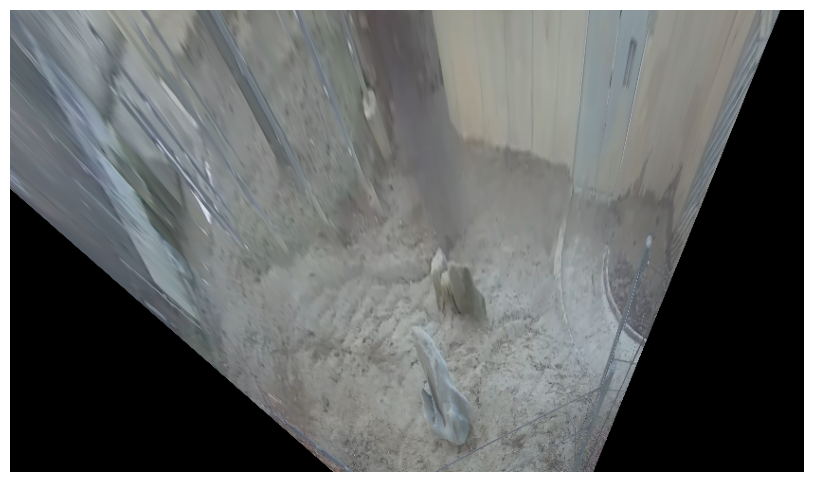

In [84]:
plot_images(dst)


488 838


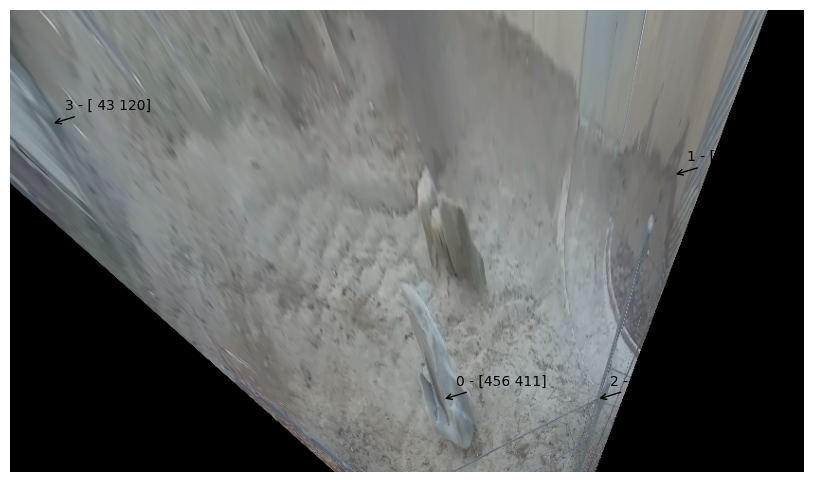

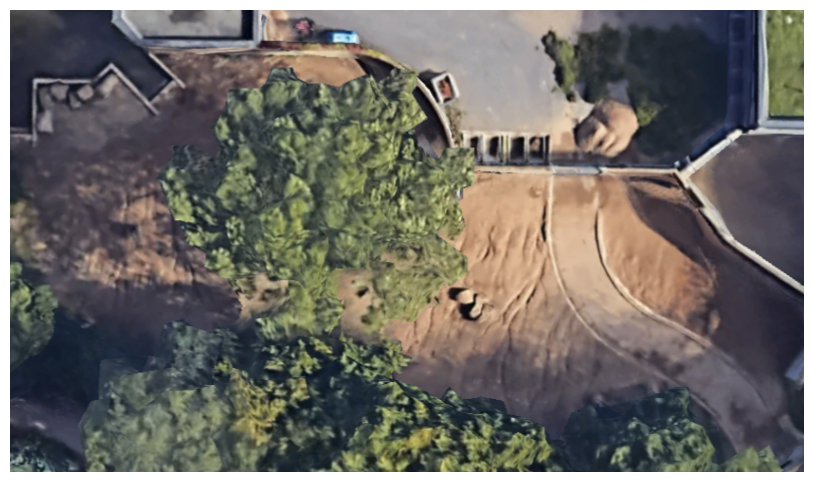

In [80]:
IMAGE_PTS_4 = np.array([[748, 340], [1778, 148], [1711, 375], [169, 151]])
MAP_PTS_4 = np.array([ [456, 411], [700, 174], [619, 411], [43, 120]])

background = cv2.imread('backgrounds/background4.png')
map = cv2.imread('maps/map4_real.png')
H, mask = cv2.findHomography(IMAGE_PTS_4, MAP_PTS_4)
height, width = map.shape[:2]
print(height, width)
dst = cv2.warpPerspective(background, H, (width, height))
plot_images(dst)
for i, pt in enumerate(MAP_PTS_4):
    plt.annotate(str(i) + " - " + str(pt), xy=pt, textcoords="offset points", xytext=(10,10), arrowprops=dict(arrowstyle="->"))
plot_images(map)

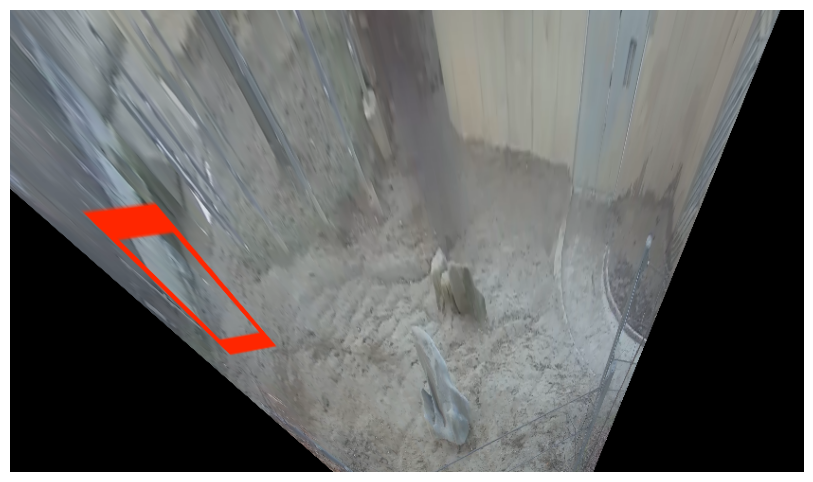

In [85]:
background = cv2.imread('background4.png')
dst = cv2.warpPerspective(background, H, (width, height))
plot_images(dst)

In [68]:
background.shape

(488, 838, 3)

In [70]:
dst.shape

(488, 838, 3)